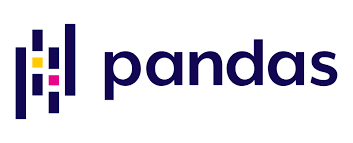

# [1] Menyertakan Prefix dan Sufix pada seluruh Kolom Data Frame

In [14]:
#import versi pandas dan numpy yang digunakan oleh user
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


In [15]:
#membuat data frame sederhana dengan jumlah baris dan kolom 5, kolom akan diberi label ABCDE
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')
# data akan diisi oleh integer random antara 1-10 , jumlah baris dan kolom sesuai dengan n_rows dan n_cols
df = pd.DataFrame(np.random.randint(1,10,size=(n_rows,n_cols)),columns=cols)
df


,A,B,C,D,E
0,3,7,3,4,7
1,8,1,3,9,8
2,1,6,8,6,1
3,1,9,7,1,1
4,4,6,7,4,7


In [4]:
tuple('ABCDE')

('A', 'B', 'C', 'D', 'E')

In [5]:
#prefix adalah string di depan string tertentu / awalan
#penambahan prefix dapat dilakukan dengan fungsi di bawah
#label kolom akan berubah menjadi kolom_[label awal] setelah ditambahkan prefix
df.add_prefix('kolom_')

,kolom_A,kolom_B,kolom_C,kolom_D,kolom_E
0,6,8,2,4,8
1,4,5,8,5,1
2,2,6,8,6,4
3,1,8,8,8,7
4,1,1,5,7,6


In [6]:
#sufix adalah string di belakang string tertentu
#penambahan sufix dapat dilakukan dengan fungsi di bawah

#label kolom akan berubah menjadi [label awal]_field setelah ditambahkan sufix
df.add_suffix('_field')

,A_field,B_field,C_field,D_field,E_field
0,6,8,2,4,8
1,4,5,8,5,1
2,2,6,8,6,4
3,1,8,8,8,7
4,1,1,5,7,6


# [2] Pemilihan Baris pada Data Frame

In [17]:
#membuat dataframe dengan ukuran baris 10 dan kolom 5
import pandas as pd
import numpy as np
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')
#isi data frame adalah integer random yang berkisar dari 1 sampai dengan 5
df = pd.DataFrame(np.random.randint(1,5,size=(n_rows,n_cols)),columns=cols)
df

,A,B,C,D,E
0,3,2,1,1,4
1,3,4,2,4,3
2,3,2,1,2,3
3,2,4,4,3,2
4,3,3,1,3,1
5,4,4,3,2,2
6,3,3,4,2,1
7,4,4,3,2,3
8,1,3,3,3,2
9,3,3,4,2,3


In [18]:
#menyeleksi kolom yang A nya merupakan angka 1 atau 3
df[(df['A']==1)|(df['A']==3)]

,A,B,C,D,E
0,3,2,1,1,4
1,3,4,2,4,3
2,3,2,1,2,3
4,3,3,1,3,1
6,3,3,4,2,1
8,1,3,3,3,2
9,3,3,4,2,3


In [19]:
#logika is in juga sama dengan logika or
df[df['A'].isin([1,3])]

,A,B,C,D,E
0,3,2,1,1,4
1,3,4,2,4,3
2,3,2,1,2,3
4,3,3,1,3,1
6,3,3,4,2,1
8,1,3,3,3,2
9,3,3,4,2,3


In [20]:
#menampilkan baris yang kolom A tidak bernilai 1 atau 3 menggunakan logika negasi
df[-df['A'].isin([1,3])]

,A,B,C,D,E
3,2,4,4,3,2
5,4,4,3,2,2
7,4,4,3,2,3


# [3] Konversi Tipe Data String ke Numerik pada Data Frame

In [21]:
#mengimport modul pandas dan mencetak versi pandas yang digunakan
import pandas as pd
print(pd.__version__)

1.0.5


In [11]:
#membentuk data frame dengan isi pasangan key dan values
#keys akan menjadi nama kolom
data = {'col1':['1','2','3','teks'],
       'col2':['1','2','3','4s']}
df = pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [12]:
#melihat tipe data pada data frame
#karena valuenya merupakan string maka tipe datanya dikenali sebagai string
df.dtypes

col1    object
col2    object
dtype: object

In [13]:
#syntax mengubah type data kolom2 menjadi integer
#hasil konversi ditampung dalam variabel df_x
df_x = df.astype({'col2':'int'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [22]:
#pengecekan type data menjadi integer
df_x.dtypes

col1    object
col2     int32
dtype: object

## [3.1] Konversi tipe data numeric dengan fungsi to_numeric()

In [24]:
#konversi keseluruhan kolom ke tipe data numerik
#parameter coerce berarti jika ada data yang tidak dapat dikonversi selama proses, maka tersebut akan berubah menjadi NaN
df_x.apply(pd.to_numeric,errors='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


# [4] Pemilihan kolom pada Data Frame Berdasarkan Tipe Data

In [25]:
#import versi pandas dan numpy yang digunakan oleh user
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.0.5
1.18.5


In [28]:
#membuat data frame dengan isi 5 baris dan 2 kolom
n_rows=5
n_cols=2
#kolom akan diberi nama bil_pecahan dan bil_bulat
cols=['bil_pecahan','bil_bulat']
#membuat objek data frame dengan random integer 1-20 dengan size menyesuaikan dengan 5 baris dan 2 kolom
df = pd.DataFrame(np.random.randint(1,20,size=(n_rows,n_cols)),columns=cols)
#karena semuanya integer, maka pada bagian bil_pecahan perlu dikonversi menjadi type data float
df['bil_pecahan']=df['bil_pecahan'].astype('float')
#membuat index dengan type data time , frekuensinya dalam jam
df.index = pd.util.testing.makeDateIndex(n_rows,freq='H')
df = df.reset_index()
#kolom ke 4
df['text']=list('ABCDE')
df

,index,bil_pecahan,bil_bulat,text
0,2000-01-01 00:00:00,19.0,10,A
1,2000-01-01 01:00:00,9.0,15,B
2,2000-01-01 02:00:00,19.0,18,C
3,2000-01-01 03:00:00,2.0,19,D
4,2000-01-01 04:00:00,10.0,2,E


In [29]:
df.dtypes

index          datetime64[ns]
bil_pecahan           float64
bil_bulat               int32
text                   object
dtype: object

## [4.1] Memilih Kolom Dengan Tipe Data Numerik

In [30]:
#fungsi ini hanya akan memanggil kolom dengan tipe data numerik saja
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
0,19.0,10
1,9.0,15
2,19.0,18
3,2.0,19
4,10.0,2


## [4.2] Memilih Kolom Dengan Tipe Data Float

In [31]:
#fungsi ini hanya akan memanggil kolom dengan tipe data float
df.select_dtypes(include='float')

,bil_pecahan
0,19.0
1,9.0
2,19.0
3,2.0
4,10.0


## [4.3] Memilih Kolom Dengan Tipe Data Integer

In [32]:
#fungsi ini hanya akan memanggil kolom dengan tipe data int
df.select_dtypes(include='int')

,bil_bulat
0,10
1,15
2,18
3,19
4,2


## [4.4] Memilih Kolom Dengan Tipe Data Object

In [33]:
#fungsi ini hanya akan memanggil kolom dengan tipe data object
df.select_dtypes(include='object')

,text
0,A
1,B
2,C
3,D
4,E


## [4.5] Memilih Kolom Dengan Tipe Data DateTime

In [34]:
#fungsi ini hanya akan memanggil kolom dengan tipe data date time
df.select_dtypes(include='datetime')

,index
0,2000-01-01 00:00:00
1,2000-01-01 01:00:00
2,2000-01-01 02:00:00
3,2000-01-01 03:00:00
4,2000-01-01 04:00:00


## [4.6] Memilih Kolom Dengan Tipe Data Gabungan

In [35]:
df.select_dtypes(include=['number','object'])

,bil_pecahan,bil_bulat,text
0,19.0,10,A
1,9.0,15,B
2,19.0,18,C
3,2.0,19,D
4,10.0,2,E
